# Predicting Used Car Prices

Suppose we have the following problem:

> Tom wants to sell his car, but doesn't know how much he should sell it for. He wants to sell it for as much as possible, but also have it be reasonably priced so someone would want to purchase it. How can we help Tom determine the best price for the car?

In short: `Can we estimate the price of a used car based on its characteristics?`.

### Data Source

The data can be found at: https://archive.ics.uci.edu/dataset/10/automobile
- We can view the data contents (excludes headers) at: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

### Table of Contents:

- [0. Prerequisites](#0.-Prerequisites)
- [1. Reading the Cleaned Data](#1.-Reading-the-Cleaned-Data)
- [2. Modeling](#2.-Modeling)
  - [2.1 Simple Linear Regression](#2.1-Simple-Linear-Regression)
  - [2.2 Multiple Linear Regression](#2.2-Multiple-Linear-Regression)
  - [2.3 Polynomial Regression](#2.3-Polynomial-Regression)
- [3. Pipelines](#3.-Pipelines)
- [4. Model Evaluation Using Visualizations](#4.-Model-Evaluation-Using-Visualizations)
  - [4.1 Regression Plot](#4.1-Regression-Plot)
  - [4.2 Residual Plot](#4.2-Residual-Plot)
  - [4.3 Distribution Plot](#4.3-Distribution-Plot)
- [5. Measures for In-Sample Evaluation](#5.-Measures-for-In-Sample-Evaluation)
  - [5.1 Simple Linear Regression](#5.1-Simple-Linear-Regression)
  - [5.2 Multiple Linear Regression](#5.1-Multiple-Linear-Regression)
- [6. Prediction and Decision Making](#6.-Prediction-and-Decision-Making)


<hr />

# 0. Prerequisites

Before you run this notebook, complete the following steps:
- Install Libraries/Packages
- Import Required Modules


### Install Libraries/Packages

This will install all of the libraries/packages used in all of the notebooks for this project.

In [ ]:
! pip install pandas numpy scipy matplotlib seaborn scikit-learn

### Import Required Modules

Import and configure the required modules.

In [169]:
from typing import List
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 1. Reading the Cleaned Data

We start off by reading the cleaned dataset, displaying the first 5 rows, and then taking a look at the inferred columns and column types.

In [170]:
# Define file location.
DATA_PATH = "./automobile_cleaned.csv"
# Use pandas to read the data.
cleaned_data = pd.read_csv(DATA_PATH)
# Display the first 5 rows.
cleaned_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [171]:
cleaned_data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# 2. Modeling

There are many models available to choose, in which we'll test the following:
- Simple Linear Regression
- Multiple Linear Regression
- Polynomial Regression

### 2.1 Simple Linear Regression

This model helps us understand the relationship between 2 variables through a linear equation (`y = a + bx`).

For our example, we'll create a simple linear regression model to figure out how `highway-mpg` can be used to predict car prices.

In [172]:
def createLRModel(independent_variables: List[str]):
  """
  Creates a Linear Regression model which predicts the `price` from the
  provided independent variables. Works with both Simple & Multiple Linear
  Regression.
  """
  # Create Linear Regression object.
  lre = LinearRegression()
  # Get the values for the independent & dependent variables.
  X = cleaned_data[independent_variables]
  Y = cleaned_data["price"]
  # Fit/train the model.
  lre.fit(X, Y)
  # Predict values.
  Yhat = lre.predict(X)
  # Generate the resulting linear equation.
  eq = f"y = {lre.intercept_}{"".join([f" + ({lre.coef_[i]} * {ind_var})" for i, ind_var in enumerate(independent_variables)])}"
  return (lre, X, Y, Yhat, eq)

def analyzeLRModel(independent_variables: List[str], n=5):
  """
  Prints out the equation from creating a Linear Regression model from
  independent variables and displays the first `n` rows comparing the
  predicted and actual results.
  """
  _, _, Y, Yhat, eq = createLRModel(independent_variables)
  # Print linear equation representing Linear Regression model.
  print(eq)
  # Compare the predicted results with the actual values.
  comparison = pd.DataFrame({
    **{ ind_var: cleaned_data[ind_var] for ind_var in independent_variables }, # Unpack dictionary
    "price": Y,
    "predicted-price": Yhat,
    "price-difference": Y - Yhat
  })
  with pd.option_context("display.max_columns", None, "display.width", 1000):
    print(comparison[:n])

In [173]:
# Allow us to dynamically change the independent variable used.
ind_variable = "highway-mpg"

analyzeLRModel([ind_variable])

y = 38423.3058581574 + (-821.7333783219254 * highway-mpg)
   highway-mpg    price  predicted-price  price-difference
0           27  13495.0     16236.504643      -2741.504643
1           27  16500.0     16236.504643        263.495357
2           26  16500.0     17058.238022       -558.238022
3           30  13950.0     13771.304508        178.695492
4           22  17450.0     20345.171535      -2895.171535


### 2.2 Multiple Linear Regression

This allows us to understand the relation between a continuous target variable and multiple predictor variables through a linear equation (`y = a + (b1 * x1) + (b2 * x2) + ...`).

For our example, we'll create a multiple linear regression model to figure out how `horsepower`, `curb-weight`, `engine-size`, and `highway-mpg` can be used to predict car prices.

In [174]:
# Allow us to dynamically change the independent variables used.
ind_variables = ["horsepower", "curb-weight", "engine-size", "highway-mpg"]

analyzeLRModel(ind_variables)

y = -15824.03820823447 + (53.610427289244285 * horsepower) + (4.708864437965234 * curb-weight) + (81.47225667191267 * engine-size) + (36.396378233810076 * highway-mpg)
   horsepower  curb-weight  engine-size  highway-mpg    price  predicted-price  price-difference
0       111.0         2548          130           27  13495.0     13699.001388       -204.001388
1       111.0         2548          130           27  16500.0     13699.001388       2800.998612
2       154.0         2823          152           26  16500.0     19055.180751      -2555.180751
3       102.0         2337          109           30  13950.0     10621.208891       3328.791109
4       115.0         2824          136           22  17450.0     15519.941331       1930.058669


### 2.3 Polynomial Regression

Polynomial regression is a special case of the linear regression model for describing curvilinear relationships, represented by a higher-order equation.

This involves a couple of steps:
1. Normalize/standardize features.
2. Creating a feature matrix containing all polynomial combinations of the provided features with degree ≤2.
3. Create a linear regression with the polynomial features object.

Below, we'll create the feature matrix for a polynomial regression model of degree 2 with the `horsepower`, `curb-weight`, `engine-size`, and `highway-mpg` features.

In [175]:
# Get dataframe of features from `2.2 Multiple Linear Regression` code.
_, X, Y, Yhat, _ = createLRModel(ind_variables)

# Create a feature matrix containing all polynomial combinations of the provided features with degree ≤2.
pr = PolynomialFeatures(degree=2)
poly_features = pr.fit_transform(X)
print(f"Transformed {X.shape[1]} features into {poly_features.shape[1]} features.")

Transformed 4 features into 15 features.


# 3. Pipelines

Pipelines simplify the steps of processing the data.

We'll now complete all the steps for creating a polynomial regression model from the example in section `2.3`.

In [176]:
# Create a list of tuples containing the steps used for
steps = [
  # Transformations
  ("scale", StandardScaler()),
  ("polynomial", PolynomialFeatures(degree=2, include_bias=False)),
  # Prediction
  ("model", LinearRegression())
  ]
# Create the pipeline object.
pipe = Pipeline(steps)
# Convert the independent variables to use the `float` type.
X = X.astype(float)
# Fit/train the model.
pipe.fit(X, Y)
# Predict values.
ypipe = pipe.predict(X)
# Compare the predicted results with the actual values.
ind_vars_dict = { ind_var: cleaned_data[ind_var] for ind_var in ind_variables }
comparison = pd.DataFrame({
  **ind_vars_dict, # Unpack dictionary
  "price": cleaned_data["price"],
  "predicted-price": ypipe,
  "price-difference": cleaned_data["price"] - ypipe
})
comparison[:5]

,horsepower,curb-weight,engine-size,highway-mpg,price,predicted-price,price-difference
0,111.0,2548,130,27,13495.0,13103.377450,391.622550
1,111.0,2548,130,27,16500.0,13103.377450,3396.622550
2,154.0,2823,152,26,16500.0,18228.500455,-1728.500455
3,102.0,2337,109,30,13950.0,10392.955633,3557.044367
4,115.0,2824,136,22,17450.0,16133.768744,1316.231256


# 4. Model Evaluation Using Visualizations

There are many ways on how we can evaluate our models. One way is through visualizations.

### 4.1 Regression Plot

Regression plots are a good way of visualizing whether the results of our model (visualized through a regression line) is a good fit for the data (the dots in a scatter plot).

> You can refer to the `2.2.1 Scatter Plot with Regression Line` section in `2. Data Analysis.ipynb`.

### 4.2 Residual Plot

Residual plots are a good way of visualizing variance as it displays the **residuals/error/difference** between the actual and predicted values. We want to pay attention to the **spread of the residual**.
- If the points are spread out along the x-axis, then a linear model is appropriate.
- If the points are spread out in a curvilinear shape, then a nonlinear function may be required.

Let's see a residual plot for the relation between `highway-mpg` and `price`.

<Axes: xlabel='highway-mpg', ylabel='price'>

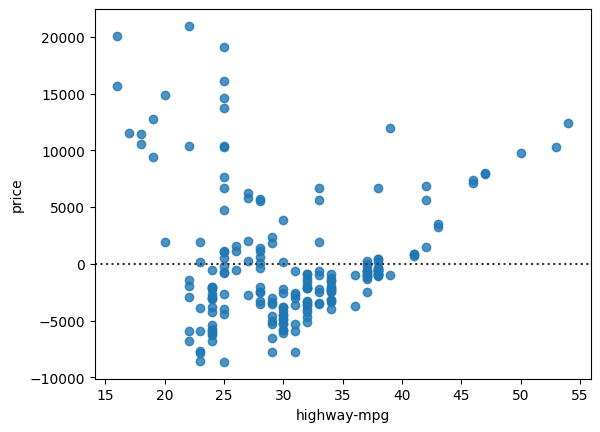

In [177]:
sns.residplot(x=cleaned_data["highway-mpg"], y=cleaned_data["price"])

We observe that the residuals aren't spread out along the x-axis, indicating that a non-linear model may be more appropriate for the data.

### 4.3 Distribution Plot

One problem we now face is figuring out how we can visualize a Multiple Linear Regression model as the plots we've been working for only works for a single independent & dependent variable.

A distribution plot solves this problem. This plot looks at the distribution of the fitted values from the model and compares it to the distribution of the actual values.

Let's plot a distribution plot for the Multiple Linear Regression model from Section 2.2.

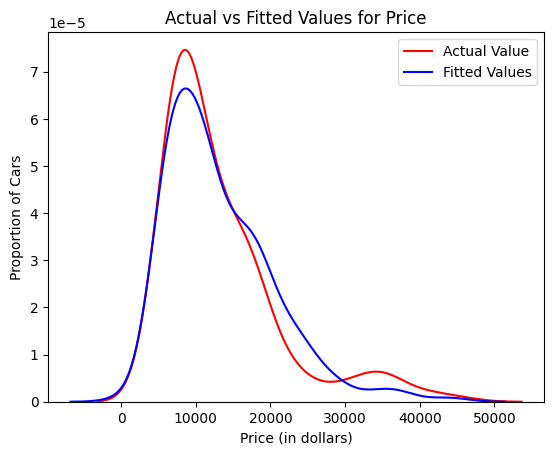

In [178]:
ax1 = sns.kdeplot(cleaned_data["price"], color="r", label="Actual Value")
sns.kdeplot(Yhat, color="b", label="Fitted Values", ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")
plt.legend()

plt.show()
plt.close()

We can observe that the fitted values are reasonably close to the actual values since the 2 distributions overlap a bit. However, this can be improved.

# 5. Measures for In-Sample Evaluation

When evaluating models, we want a quantitative measure to determine how accurate the model is. There are 2 important measures used to determine the accuracy of a model are: Mean Squared Error (MSE) and R-squared (R^2).

**Mean Squared Error (MSE):**

This is the average of the squares of errors (the error being the difference between the actual & predicted values). The smaller the value, the better the fit.

**R-squared:**

Also known as the Coefficient of Determination, it's a measure of how close the data is to the fitted regression line.

### 5.1 Simple Linear Regression

We can find the value of R^2 by using the `score()` method on the model. The MSE can be obtained by using the `mean_squared_error()` from Scikit-learn.

For our SLR from Section 2.1:

In [179]:
lre, X, Y, Yhat, _ = createLRModel([ind_variable])

print(f"The R-square is: {lre.score(X, Y)}")
print(f"The MSE of price and its predicted value is: {mean_squared_error(Y, Yhat)}")

The R-square is: 0.4965911884339176
The MSE of price and its predicted value is: 31635042.944639888


From our observations, we can say that ~49.659% of the variation of the price is explained by the SLR for `highway-mpg`.

> No observation can be said about the MSE as this is the "baseline" value.

### 5.2 Multiple Linear Regression

Likewise, we can follow the same steps as in Section 5.1 to find the R^2 and MSE value for our MLR from Section 2.2:

In [180]:
lre, X, Y, Yhat, _ = createLRModel(ind_variables)

print(f"The R-square is: {lre.score(X, Y)}")
print(f"The MSE of price and its predicted value is: {mean_squared_error(Y, Yhat)}")

The R-square is: 0.8094130135602673
The MSE of price and its predicted value is: 11976801.681229586


From our observations, we can say that:
- ~80.941% of the variation of the price is explained by the MLR for `highway-mpg`.
- We observe a noticeably lower MSE compared to the SLR model.

### 5.3 Polynomial Fit

For this, we need a different function to get the R^2 value.

We'll make a simple cubic function for the `highway-mpg` feature to see if there's any difference.

In [181]:
# Get our independent & dependent variables.
X = cleaned_data["highway-mpg"]
Y = cleaned_data["price"]
# Create the cubic function.
f = np.polyfit(X, Y, 3)
p = np.poly1d(f)
# Predict values.
Yhat = p(X)

print(f"The R-square is: {r2_score(Y, Yhat)}")
print(f"The MSE of price and its predicted value is: {mean_squared_error(Y, Yhat)}")

The R-square is: 0.674194666390652
The MSE of price and its predicted value is: 20474146.426361218


From our observations, we can say that:
- ~67.419% of the variation of the price is explained by the polynomial fit for `highway-mpg`.
- We observe a noticeably lower MSE compared to the SLR model, but not as low as the MLR model.

# 6. Prediction and Decision Making

After testing out a couple of models along with finding the R-squared and MSE values for them, we need to figure out which model is a good fit. There are some pointers to a good model such as:
- The model with the highest R^2 value has the best fit for the data.
- The model with the smallest MSE value has the best fit for the data.

From the earlier analysis, we noticed that the MLR model had the largest R^2 value and smallest MSE value compared to the SLR and Polynomial Fit models.